In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import f_oneway
from sklearn.metrics import mean_absolute_error 
import altair as alt

In [14]:
df = pd.read_csv('StudentPerformanceFactors.csv')

In [15]:
df = df.dropna()

In [16]:
df = df.iloc[:5000]

In [17]:
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']

In [18]:
df

Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0                23          84                  Low                High   
1                19          64                  Low              Medium   
2                24          98               Medium              Medium   
3                29          89                  Low              Medium   
4                19          92               Medium              Medium   
...             ...         ...                  ...                 ...   
5170             22          63                  Low                High   
5171             12          74                  Low                High   
5172             18          84                 High                 Low   
5173             14          82               Medium              Medium   
5174             23          76               Medium              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
0                            No            7               73   
1                            No            8               59   
2                           Yes            7               91   
3                           Yes            8               98   
4                           Yes            6               65   
...                         ...          ...              ...   
5170                        Yes            4               86   
5171                        Yes            6               55   
5172                         No            6               64   
5173                        Yes            4               67   
5174                         No            7               66   

     Motivation_Level Internet_Access  Tutoring_Sessions Family_Income  \
0                 Low             Yes                  0           Low   
1                 Low             Yes                  2        Medium   
2              Medium             Yes                  2        Medium   
3              Medium             Yes                  1        Medium   
4              Medium             Yes                  3        Medium   
...               ...             ...                ...           ...   
5170              Low             Yes                  0           Low   
5171             High             Yes                  0        Medium   
5172           Medium             Yes                  2           Low   
5173           Medium             Yes                  1          High   
5174           Medium             Yes                  2        Medium   

     Teacher_Quality School_Type Peer_Influence  Physical_Activity  \
0             Medium      Public       Positive                  3   
1             Medium      Public       Negative                  4   
2             Medium      Public        Neutral                  4   
3             Medium      Public       Negative                  4   
4               High      Public        Neutral                  4   
...              ...         ...            ...                ...   
5170            High      Public        Neutral                  4   
5171             Low      Public       Positive                  3   
5172            High      Public       Positive                  2   
5173          Medium      Public        Neutral                  4   
5174          Medium      Public        Neutral                  3   

     Learning_Disabilities Parental_Education_Level Distance_from_Home  \
0                       No              High School               Near   
1                       No                  College           Moderate   
2                       No             Postgraduate               Near   
3                       No              High School           Moderate   
4                       No                  College               Near   
...                    ...                      ...                ...   
5170                    No                  College             

In [33]:
slider = alt.binding_range(
    min=df['Exam_Score'].min(), 
    max=df['Exam_Score'].max(), 
    name="Exam Score", 
    step=1
)

selection = alt.selection_point(bind=slider, fields=['Exam_Score'])


chart1 = alt.Chart(df).transform_filter(
    selection
).mark_circle().encode(
    alt.X('Sleep_Hours:Q', scale=alt.Scale(domain=[4, 10]), title='Sleep Hours'),
    alt.Y('Exam_Score:Q', scale=alt.Scale(domain=[50, 101]), title='Exam Score'),
    color=alt.Color('Teacher_Quality:N', title='Teacher Quality'),
    tooltip=['Sleep_Hours', 'Exam_Score', 'Hours_Studied', 'Teacher_Quality']
).add_params(
    selection
).properties(title="Sleep Hours Vs Exam Scores Segmented by Teacher Quality")


chart2 = chart1.encode(x='Hours_Studied:Q').properties(title = \
                                                       "Hours Studied Compared To Exam Scores Labeled By Teacher Quality")

chart1 | chart2

alt.HConcatChart(...)

In [26]:
selection = alt.selection_multi(on='mouseover')


chart = alt.Chart(df).mark_circle().encode(
    x=alt.X('Attendance', scale=alt.Scale(type='linear', domain=[60, 100])),
    y=alt.Y('Exam_Score', scale=alt.Scale(type='linear', domain=[50, 105]),  title="Exam Scores"), 
    color=alt.condition(selection, 'Access_to_Resources', alt.value('lightgray'), title="Access To Resources"),
    size=alt.value(100),
    tooltip=['Attendance', 'Exam_Score', 'Access_to_Resources', 'Family_Income']
).add_selection(
    selection
)



C:\Users\sunit\AppData\Local\Temp\ipykernel_22008\1167229257.py:1: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use selection_point instead.
  selection = alt.selection_multi(on='mouseover')
C:\Users\sunit\AppData\Local\Temp\ipykernel_22008\1167229257.py:10: AltairDeprecationWarning: Deprecated in `altair=5.0.0`. Use add_params instead.
  ).add_selection(


In [31]:
access_to_resources = ['High', 'Medium', 'Low'] 


rating_res = alt.binding_radio(
    options=access_to_resources, 
    name="Access to Resources"
)


rating_select = alt.selection_point(
    fields=['Access_to_Resources'], 
    bind=rating_res
)


rating_color_condition = alt.condition(
    rating_select,
    alt.Color('Access_to_Resources:N'),
    alt.value('lightgray')
)


opacity_condition = alt.condition(
    rating_select,
    alt.value(1),  
    alt.value(0)  
)

highlight_ratings = chart.add_params(
    rating_select
).encode(
    color=rating_color_condition,  
    opacity=opacity_condition  
).properties(title="Attendence Vs Exam Scores Segmented By Access To Resources") 


highlight_ratings

alt.Chart(...)

In [14]:
filtered_df = df[(df['Exam_Score'] > lower_bound) & (df['Exam_Score'] < upper_bound)]

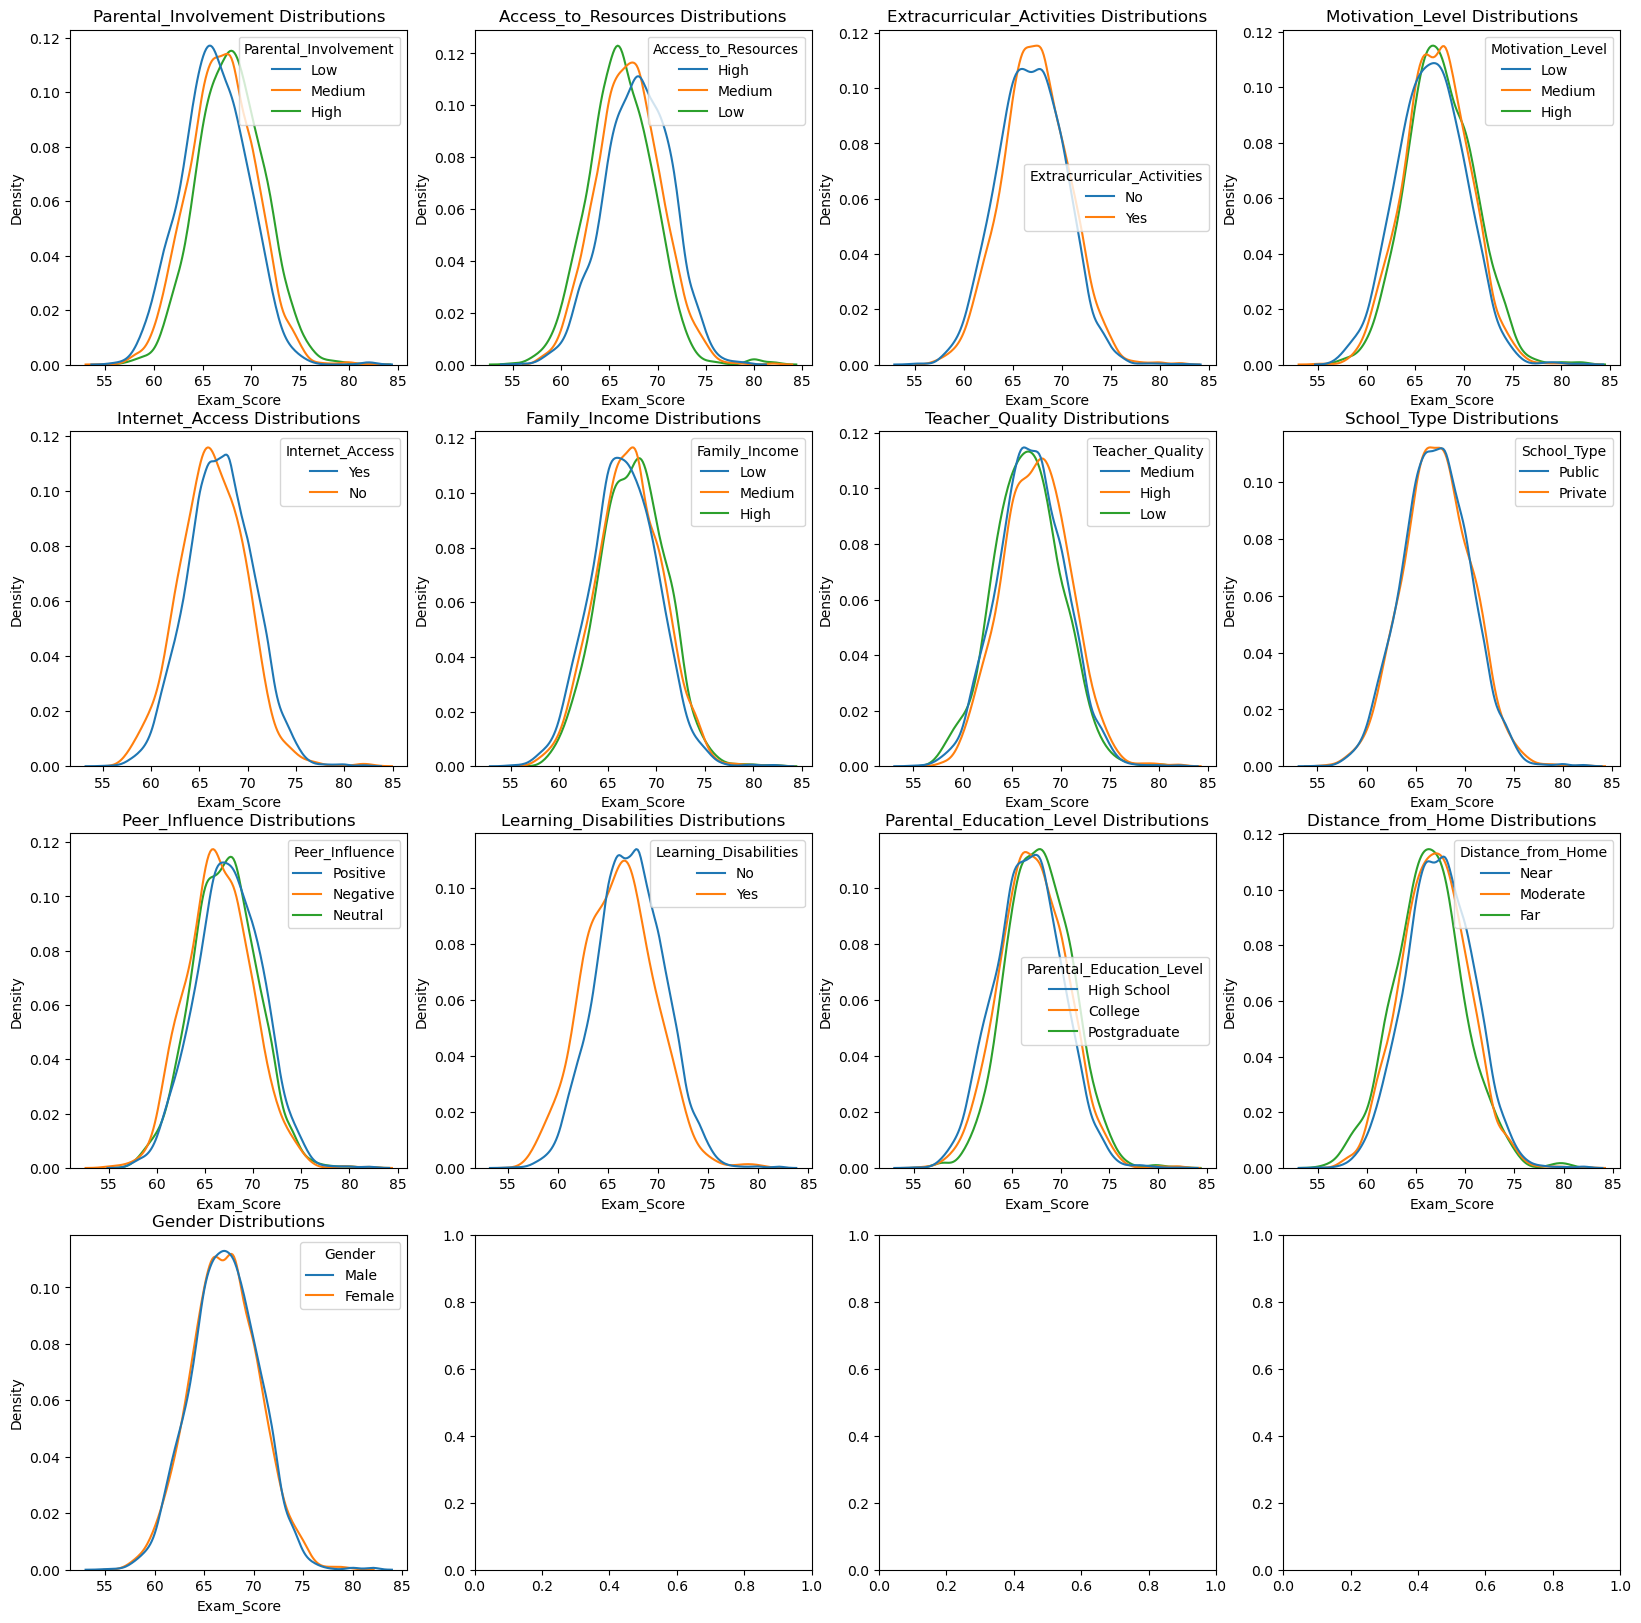

In [15]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for i, column in enumerate(categorical_columns):
    sns.kdeplot(data=filtered_df, x='Exam_Score', hue=column, ax=ax[i//4, i%4], common_norm=False)
    ax[i//4, i%4].set_title(f'{column} Distributions')

In [20]:
anova_stat = []
p_value = []
significant = []

for column in categorical_columns:
    groups = [filtered_df[filtered_df[column] == category]['Exam_Score'] for category in filtered_df[column].unique()]
    f_stat, p = f_oneway(*groups)

    anova_stat.append(f_stat)
    p_value.append(p)

    if p < 0.05:
        significant.append(True)
    else:
        significant.append(False)

pd.DataFrame({'Categorical Column': categorical_columns, 'F-Statistic': anova_stat, 'P-Value': p_value, 'Significant': significant}).to_csv('categorical_significances.csv', index=False)

In [21]:
quantitative_df = df.drop(columns=categorical_columns)

In [22]:
correlations = quantitative_df.corr()['Exam_Score'].drop('Exam_Score').reset_index()

correlations.columns = ['Feature', 'Correlation']

C:\Users\sunit\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


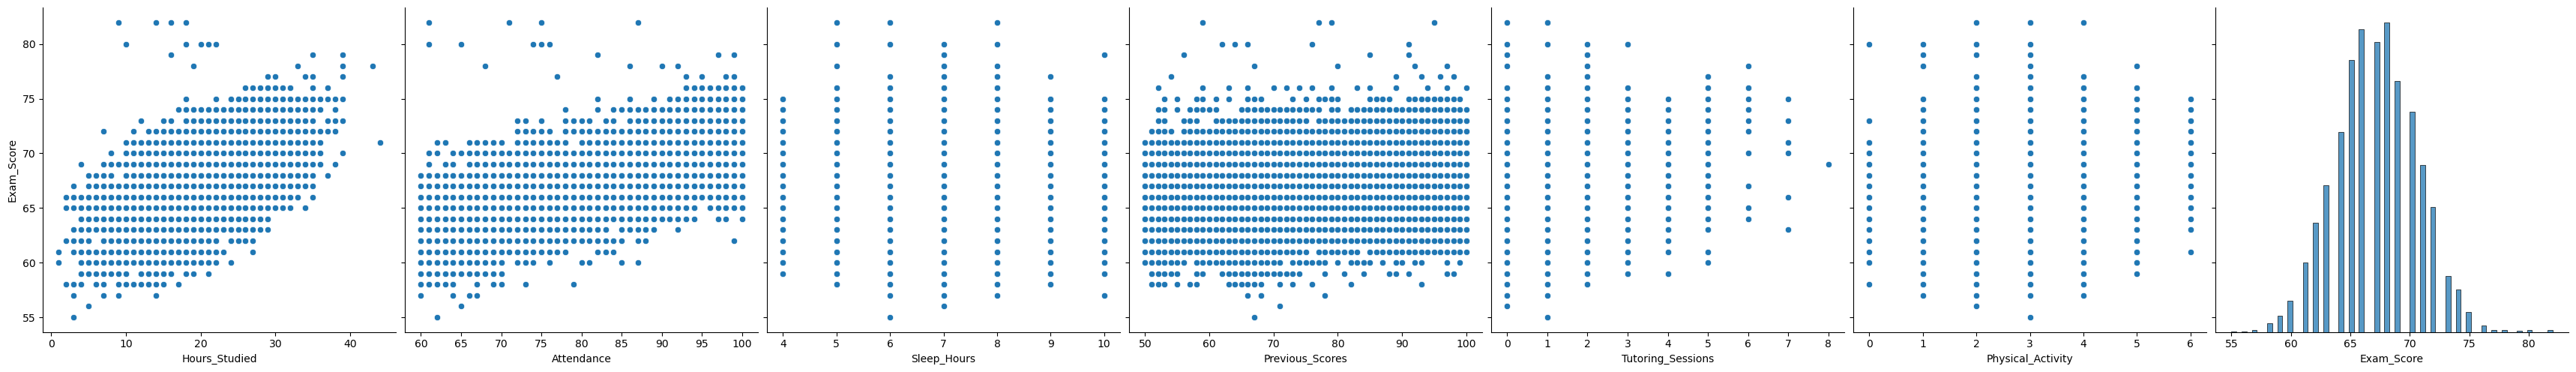

In [23]:
quantitative_columns = quantitative_df.columns.tolist()

sns.pairplot(filtered_df, x_vars=quantitative_columns, y_vars='Exam_Score', height=5)
plt.show()


































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































In [24]:
from scipy.stats import pearsonr

correlation = []
p_value = []
significant = []

for column in quantitative_df.columns:
    if column == 'Exam_Score':
        continue
    r, p = pearsonr(df['Exam_Score'], df[column])
    correlation.append(r)

    p_value.append(p)

    if p < 0.05:
        significant.append(True)
    else:
        significant.append(False)

pd.DataFrame(
    {'Feature': quantitative_df.columns[:-1], 'Pearson Corr Coeff': correlation, 'P-Value': p_value, 'Significant': significant}
).to_csv('correlations.csv', index=False)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder(sparse_output=False)

categorical_columns = list(set(categorical_columns) - {'School_Type', 'Gender'})
quantitative_columns = list(set(quantitative_columns) - {'Sleep_Hours', 'Exam_Score'})

train_df = filtered_df.copy().drop(columns=['Exam_Score', 'Sleep_Hours', 'School_Type', 'Gender'])
categorical_df = train_df[categorical_columns]
continuous_df = train_df[quantitative_columns]

one_hot_encoded = one_hot_encoder.fit_transform(categorical_df)
one_hot_df = pd.DataFrame(one_hot_encoded, columns=list(one_hot_encoder.get_feature_names_out(categorical_columns)))

concat_df = pd.concat([one_hot_df, continuous_df.reset_index(drop=True)], axis=1)

X = concat_df
y = filtered_df['Exam_Score']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.31224900014016904
R-squared: 0.9336686873689477


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


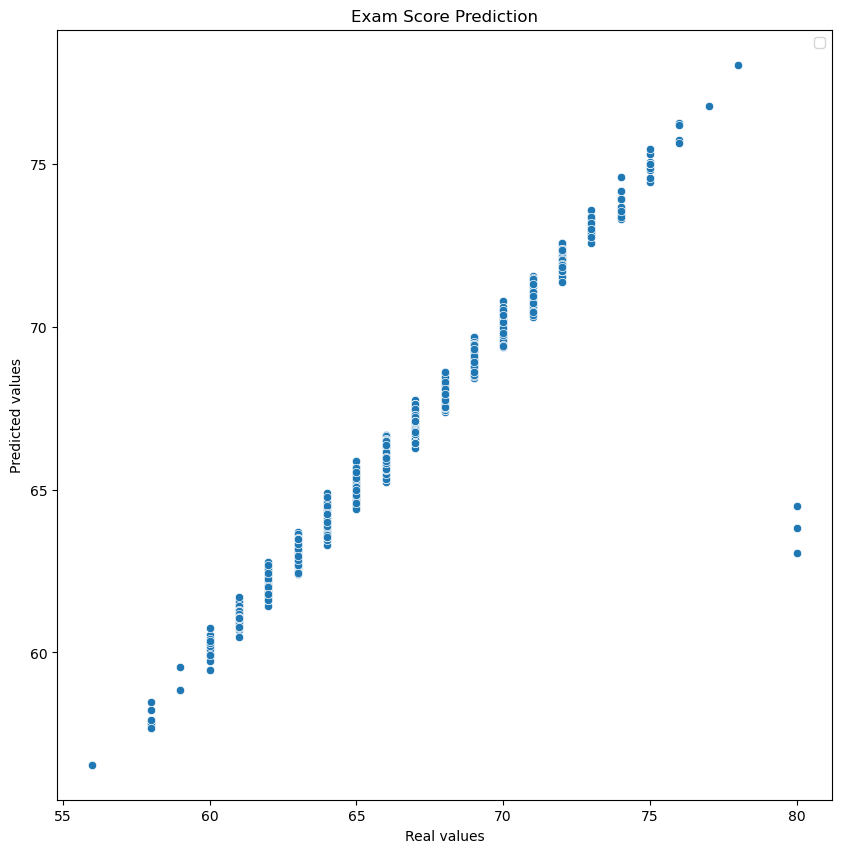

In [27]:
# Plot real vs predicted values

plt.figure(figsize=(10, 10))

sns.scatterplot(x=np.squeeze(y_test), y=np.squeeze(y_pred))


plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Exam Score Prediction')
plt.legend()
plt.show()